In [1]:
!nvidia-smi

Mon Aug 26 16:01:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="26zpvBQWbyOFByl8YSez")
project = rf.workspace("koustavs-workspace").project("summer-internship")
version = project.version(5)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Summer-Internship-5 in yolov8:: 100%|██████████| 2220/2220 [00:00<00:00, 4503.72it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 283MB/s]
New https://pypi.org/project/ultralytics/8.2.82 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Summer-Internship-5/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, st

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1724688205.0f3bbe19c1ca.2614.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


/content


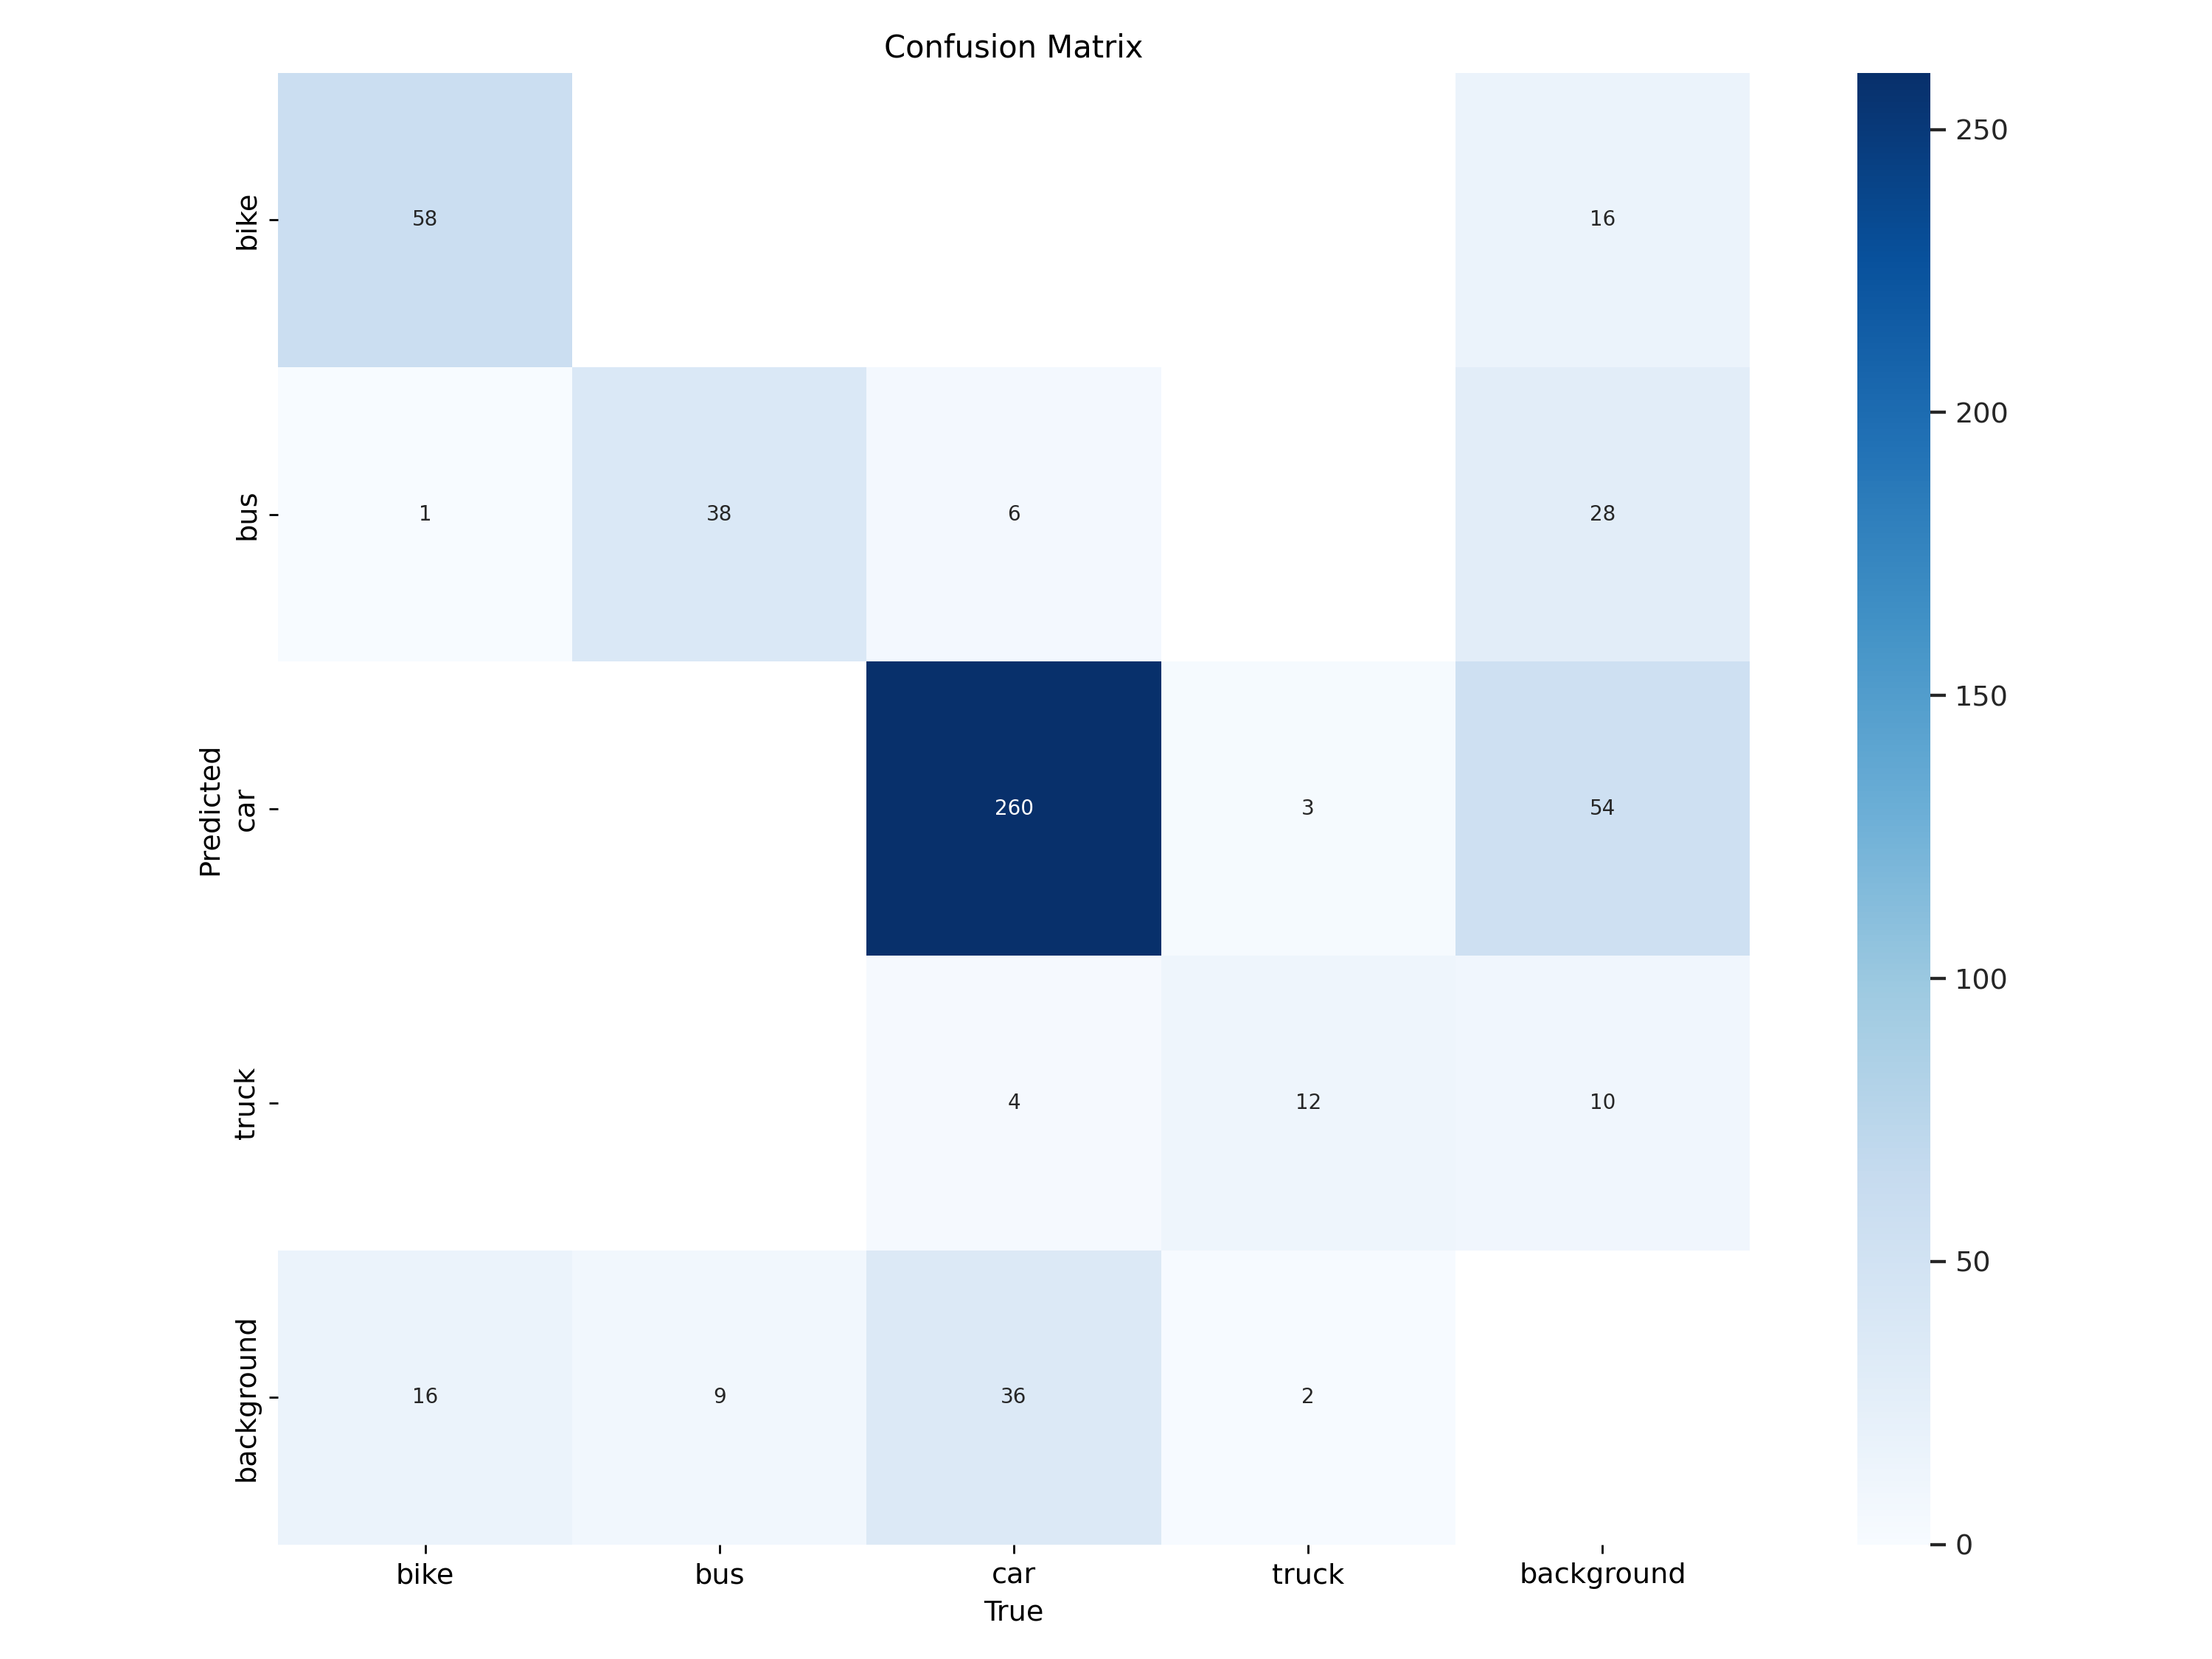

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


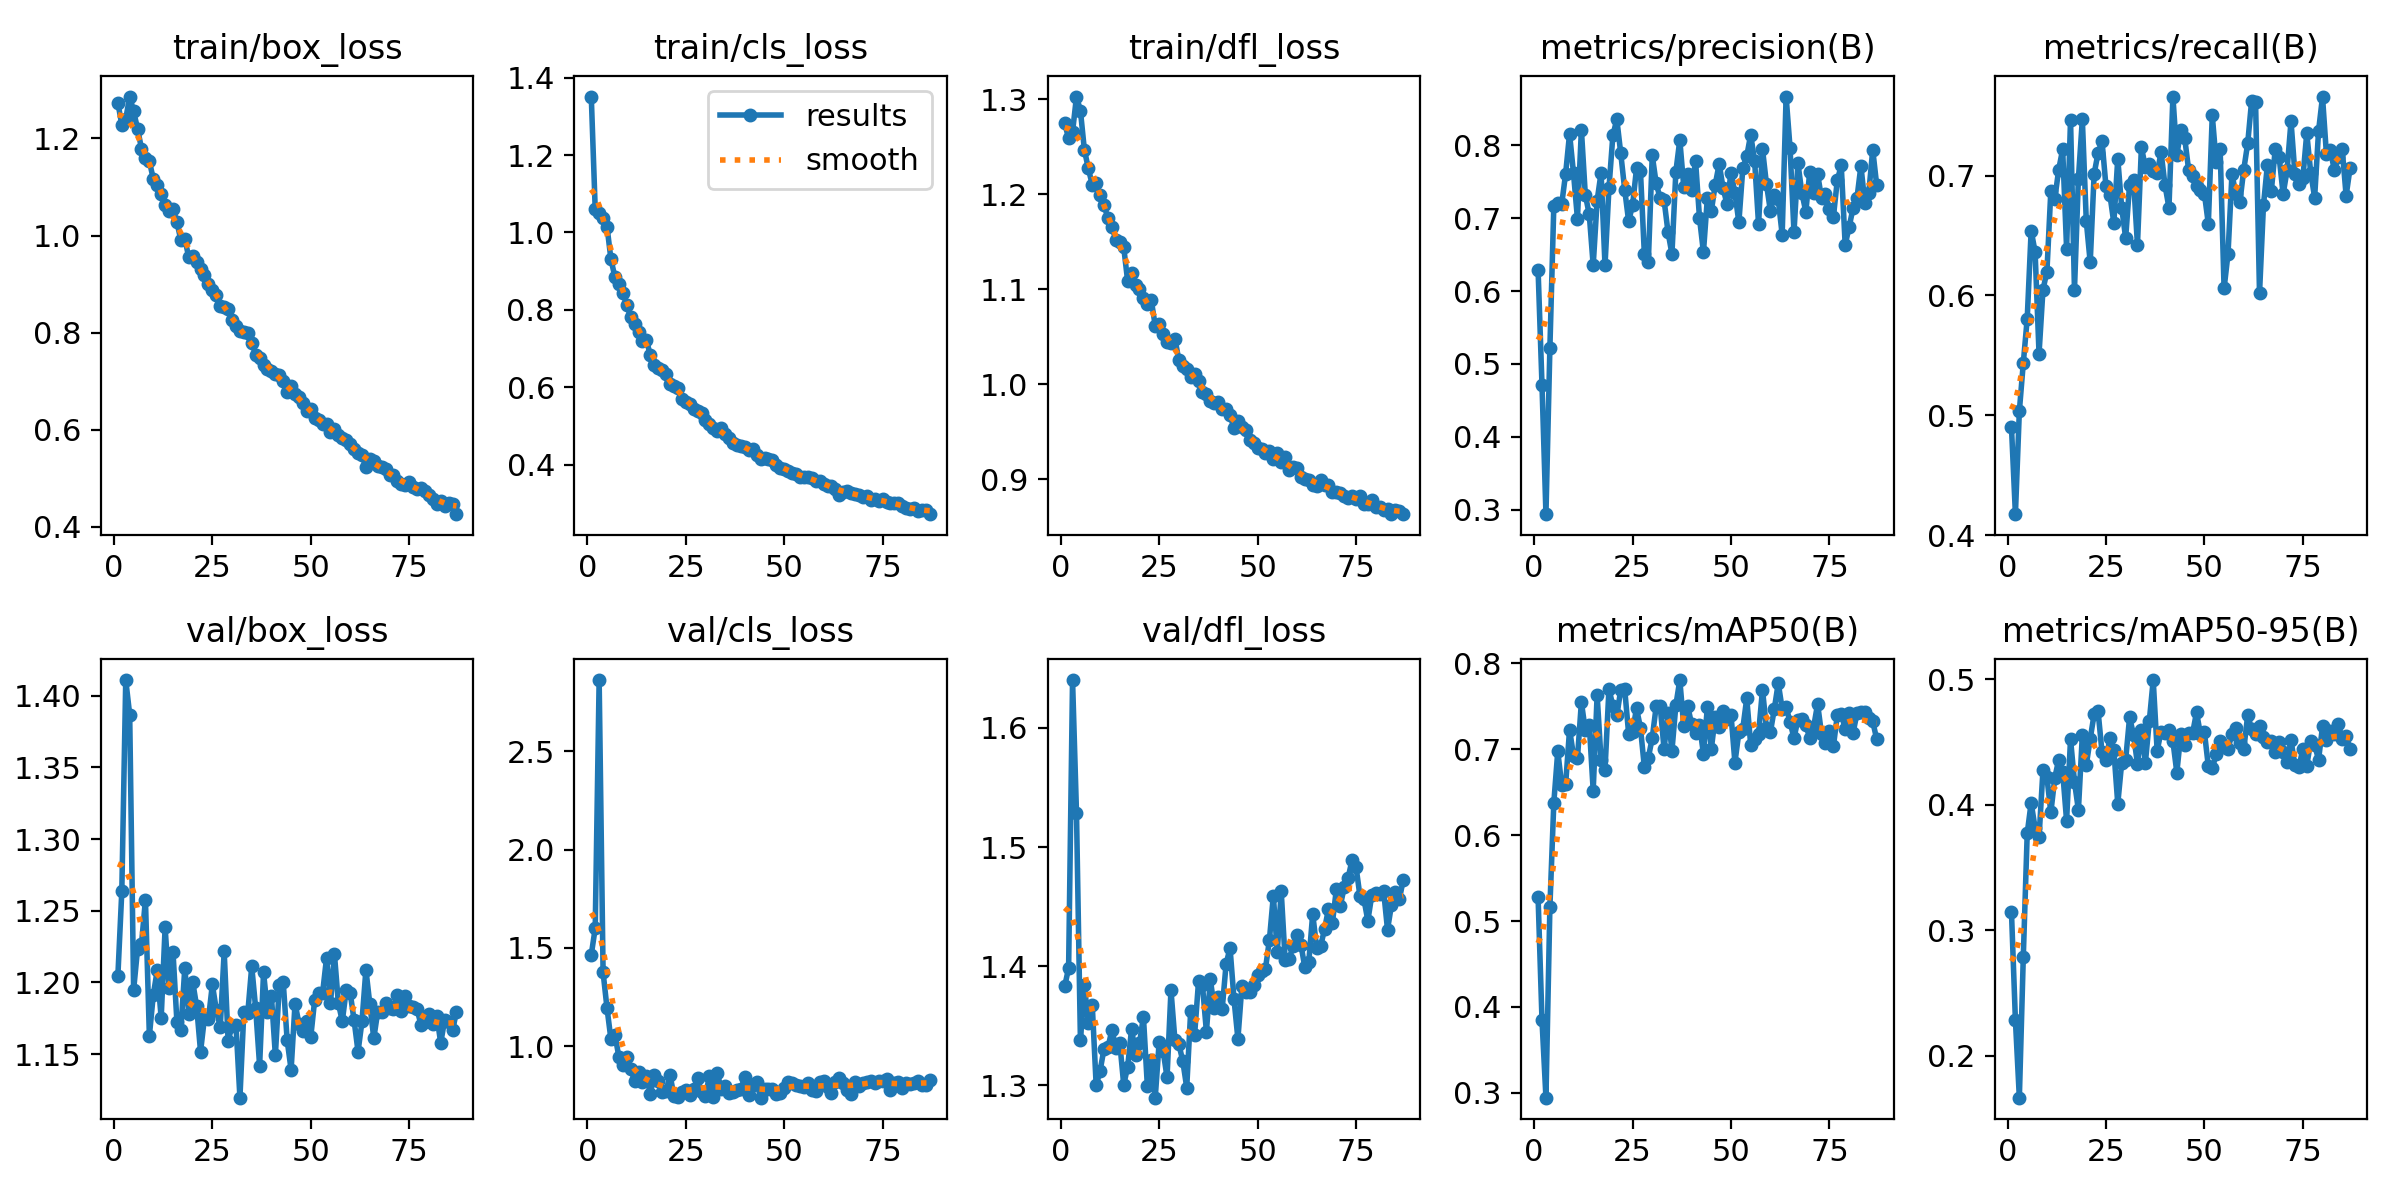

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


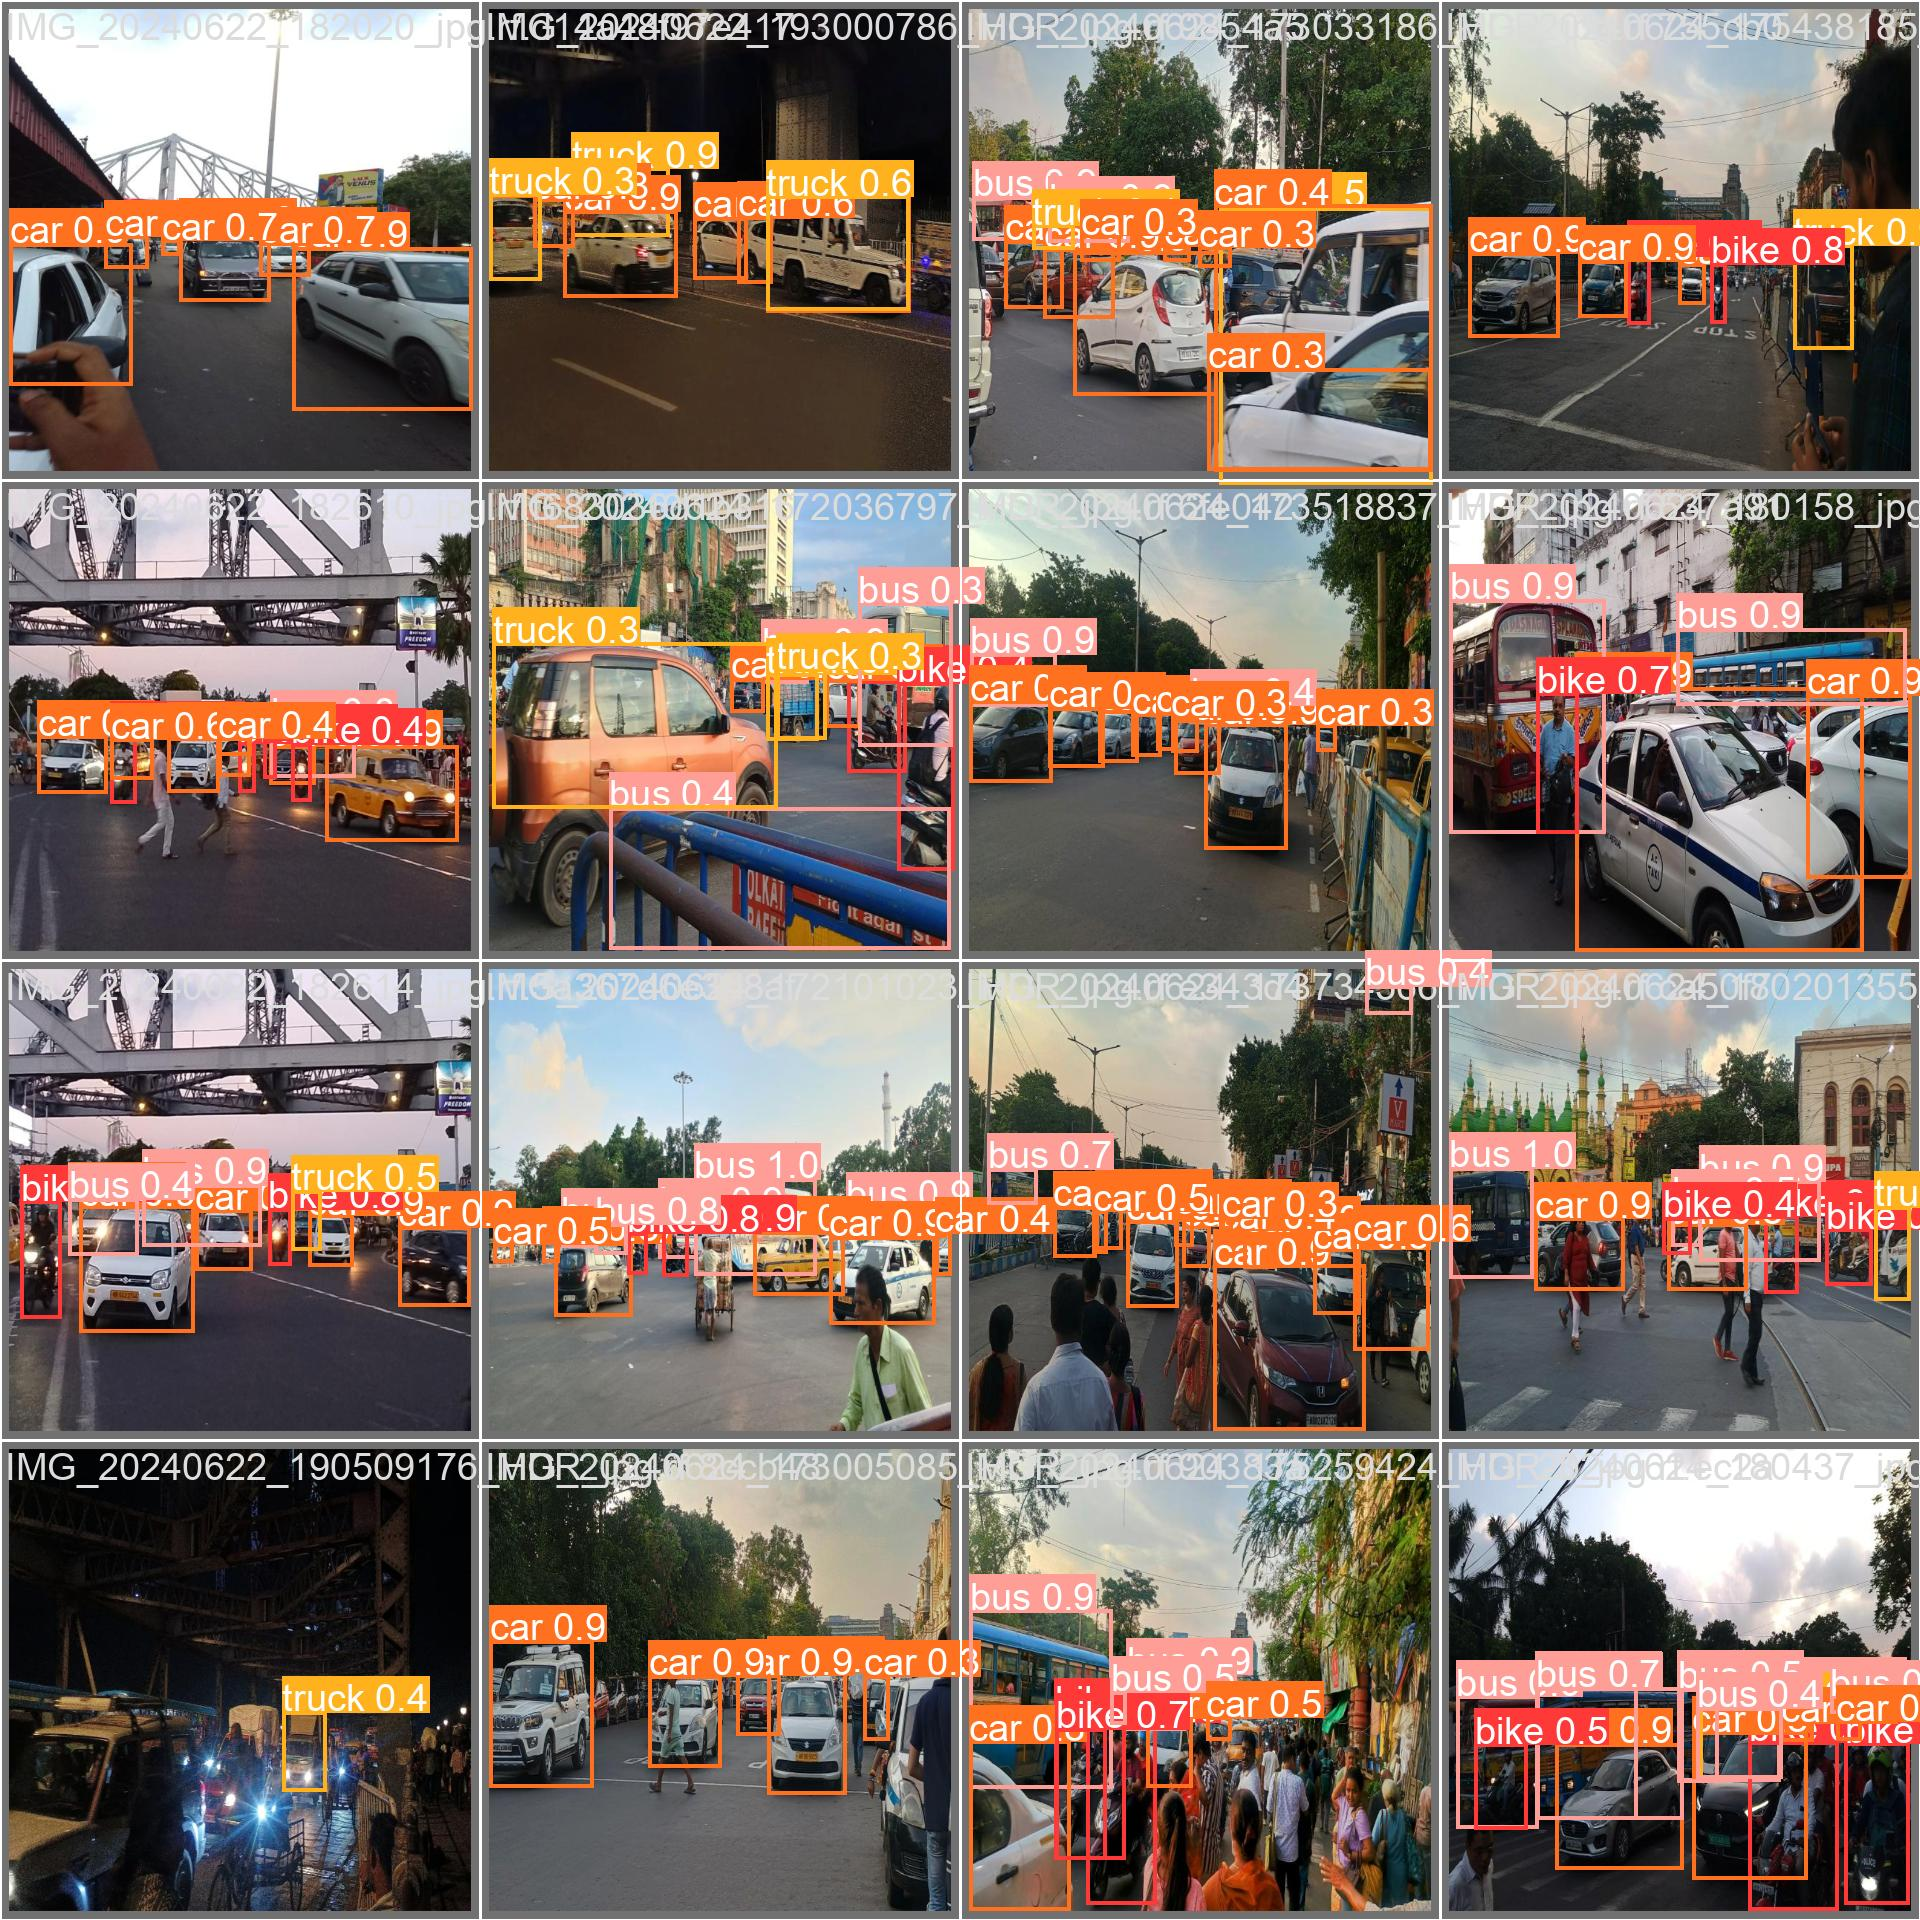

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Summer-Internship-5/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.73s/it]
                   all         49        445      0.806      0.703      0.781      0.499
                  bike         49         75      0.887      0.693      0.837      0.511
                   bus         49         47       0.68      0.745      0.749      0.439
                   car         49        306      0.913      0.788      0.892      0.653
                 truck         49         17      0.744      0.588      0.646      0.393
Speed: 3.3ms preprocess, 51.5ms inference, 0.0ms loss, 22.2ms postprocess per image
Results saved to runs/detect/v

## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/5 /content/datasets/Summer-Internship-5/test/images/IMG_20240622_184115_HDR_jpg.rf.d055ebbebbbe8371ff21084d3a8a347d.jpg: 800x800 3 buss, 4 cars, 56.8ms
image 2/5 /content/datasets/Summer-Internship-5/test/images/IMG_20240622_194946_jpg.rf.57fea0975e5c9d1cba13857c435b5e87.jpg: 800x800 3 bikes, 2 buss, 2 cars, 42.8ms
image 3/5 /content/datasets/Summer-Internship-5/test/images/IMG_20240624_171747538_MP_jpg.rf.40aedcf9b461726d985455aef1f8dda3.jpg: 800x800 2 bikes, 4 cars, 42.7ms
image 4/5 /content/datasets/Summer-Internship-5/test/images/IMG_20240624_173022360_HDR_jpg.rf.f79fb4145cb5da10affcfcea2121c039.jpg: 800x800 1 bike, 8 cars, 39.7ms
image 5/5 /content/datasets/Summer-Internship-5/test/images/Snapchat-1539397306-1_jpg.rf.0856f87bd8c3c0e827d7acdfedab3518.jpg: 800x800 1 bus, 3 cars, 1 truck, 39.8ms
Spee

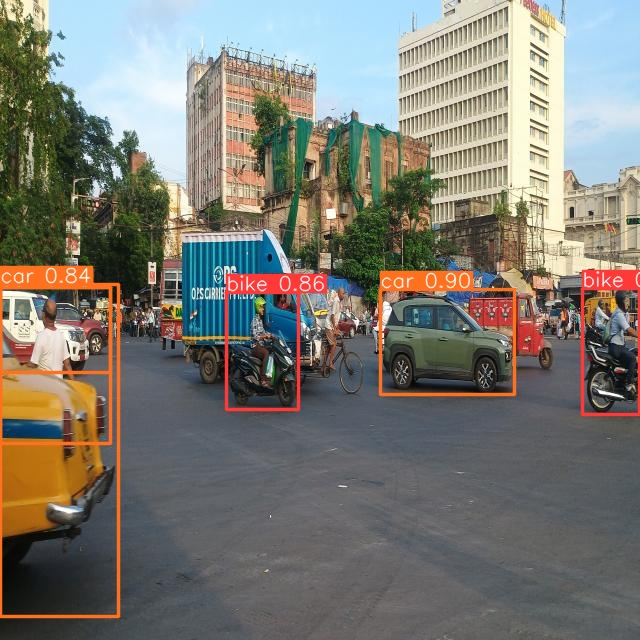

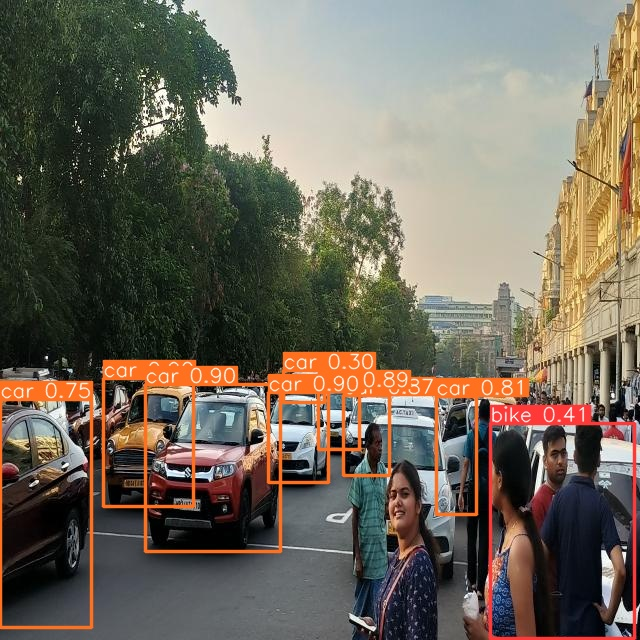

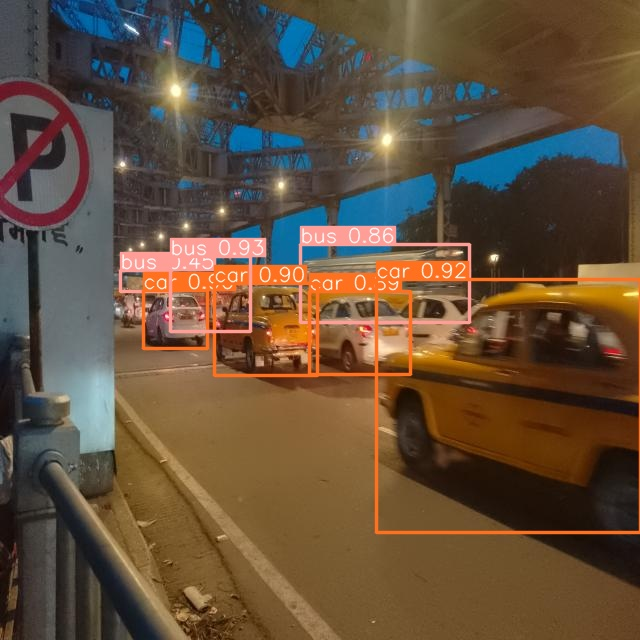

In [13]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [14]:
!zip -r /content/file.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/R_curve.png (deflated 10%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/P_curve.png (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 31%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 28%)
  adding: content/runs/detect/val/PR_curve.png (deflated 12%)
  adding: content/runs/detect/val/F1_curve.png (deflated 9%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: conten

In [15]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>